# Problem Description
Marketing selling campaigns aim to enhance business. Companies use direct marketing to target segments of customers by contacting them to meet a specific goal. We are interested in developing and accessing data-driven models to assist the bank's telemarketing campaigns.

In our specific application, the aim is to develop statistical models that can accurately predict the result of a phone call to sell long term bank deposits. Such models are valuable as they assist campaigners to prioritize and select the next customers to be contacted during marketing campaigns. Improving the efficiency of such campaigns reduces time and associated cost.

The data we are considering originates from a Portuguese bank and were collected from 2008 to 2013. The data is available on the UCI machine learning repository. You are provided with a random cleaned sample of 4100 observations from the overall dataset ( MMA Marketing Data Sample file). Each record (observation) contains the output target, y, and 19 input features. These include telemarketing attributes (e.g., call direction), product details (e.g., the interest rate offered), and client information (e.g., age). These records were enriched with social and economic influence features (e.g., unemployment variation rate), by gathering external data from the Portuguese central bank.

# Input Variables:
## Bank client information:

- age: (numeric)
- job: type of job (categorical: ’admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’, ’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
- marital: marital status (categorical: ’divorced’,’married’,’single’,’unknown’; note: ’divorced’ means divorced or widowed)
- education: (categorical: ’basic.4y’,’basic.6y’,’basic.9y’,’high.school’, ’illiterate’,’professional.course’,’university.degree’,’unknown’)
- default: has credit in default? (categorical: ’no’,’yes’,’unknown’)
- housing: has housing loan? (categorical: ’no’,’yes’,’unknown’)
- loan: has personal loan? (categorical: ’no’,’yes’,’unknown’)

## Marketing campaign information:

- contact: contact communication type (categorical: ’cellular’,’telephone’)
- month: last contact month of year (categorical: ’jan’, ’feb’, ’mar’, ..., ’nov’, ’dec’)
- day of week: last contact day of the week (categorical: ’mon’,’tue’,’wed’,’thu’,’fri’)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: ’failure’,’nonexistent’,’success’) Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3-month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- The output variable (response/ target) is denoted as y, and is a binary variable taking two values: (’yes’,’no’) where a value of ’yes’ means that a customer has accepted (bought) to open long term deposit account.

# Solution
## Imports

In [112]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
train = pd.read_csv('MMA marketing_data_sample.csv')

# Hypotheses we want to test/analyse with this dataset

First we want to identify people with high chances of setting a deposit and then which marketing measures help to get these people to apply for a deposit, so we can increase the bank's income. Below is the set of hypotheses for people's metrics:

- Older applicants are more likely to set up a deposit
- Management is more likely to set up a deposit
- Having a loan in default decreses chance of setting a deposit
- Having a housing loan (not in default) decreases chances of setting a deposit

And below is a set of hypotheses which marketing measures help to get people to set a deposit:

- People contacted at the beginning of the week are more likely to set up a deposit
- People with higher number of previous contacts are more likely to set up a deposit

# Data Exploration

In [114]:
# visually exploring the data
train.head()

,age,job,marital,k,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [115]:
# checking for null values in the dataset
train.isnull().sum()

age               0
job               0
marital           0
k                 0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [116]:
# checking the columns
train.columns

Index(['age', 'job', 'marital', 'k', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [117]:
# assessing data types available
train.dtypes

age                 int64
job                object
marital            object
k                  object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [118]:
# assesing row and column number in the dataset
train.shape

(4100, 21)

In [119]:
# assesing train data in terms of split of loan decisions
train['y'].value_counts(normalize=True)

no     0.89
yes    0.11
Name: y, dtype: float64

<Axes: >

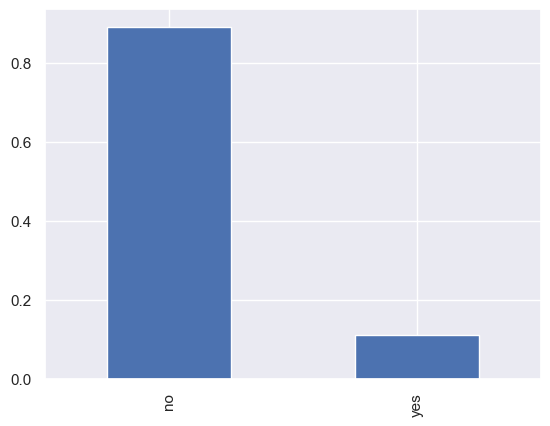

In [120]:
train['y'].value_counts(normalize=True).plot.bar()

Visualisation of different variables in order to get a better understanding of distributions of variables

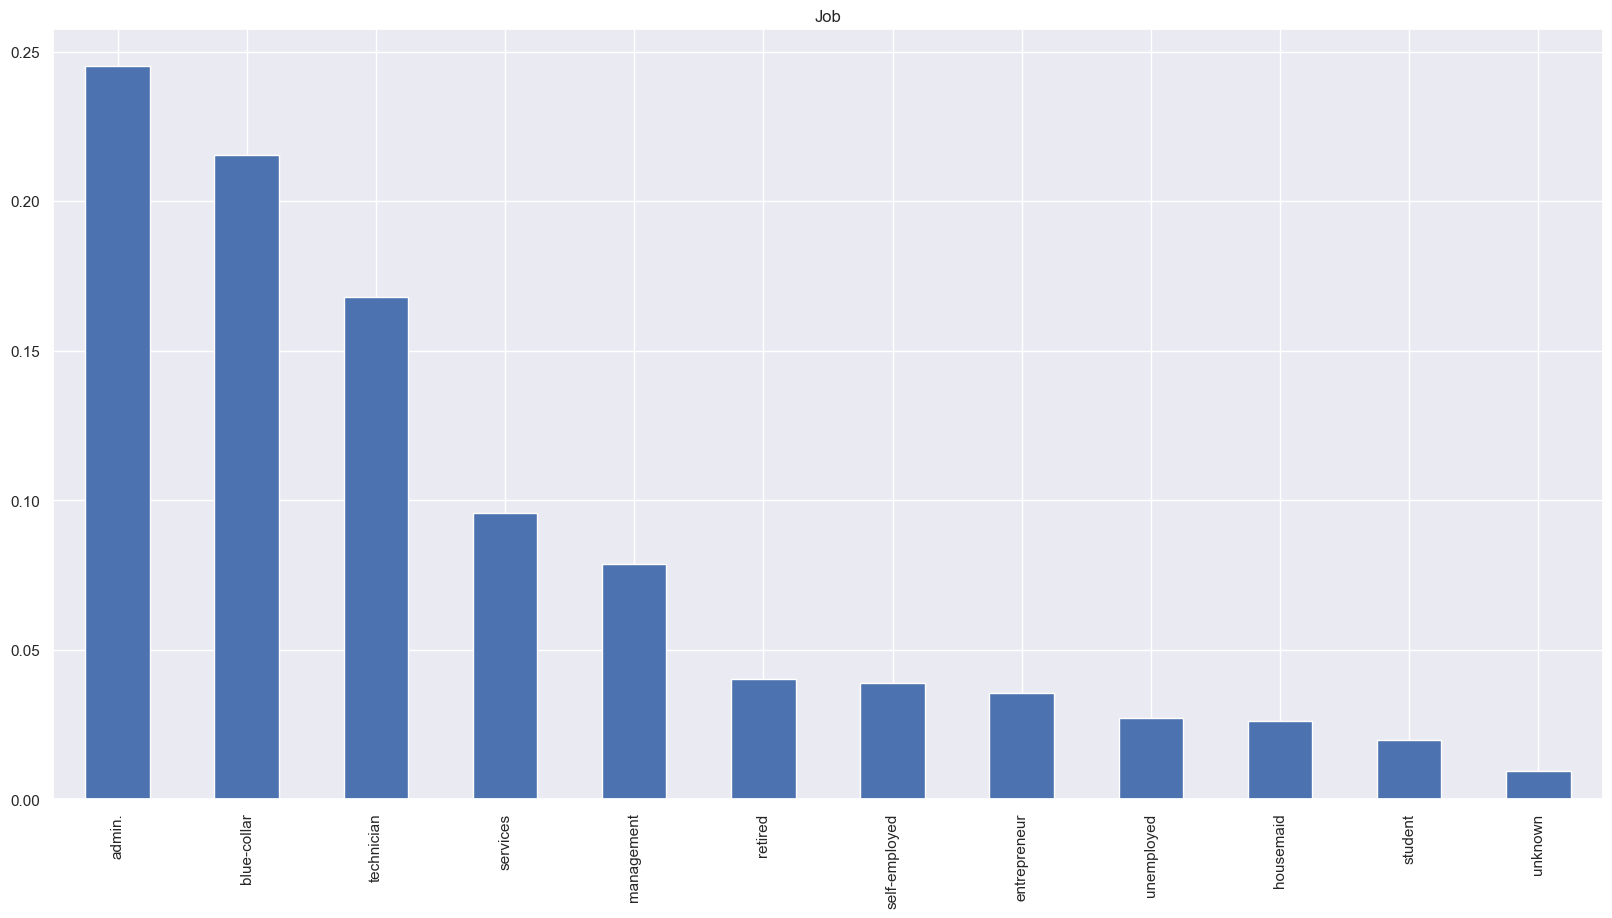

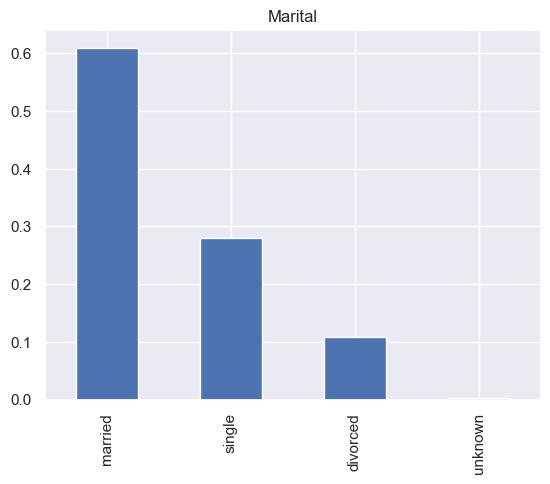

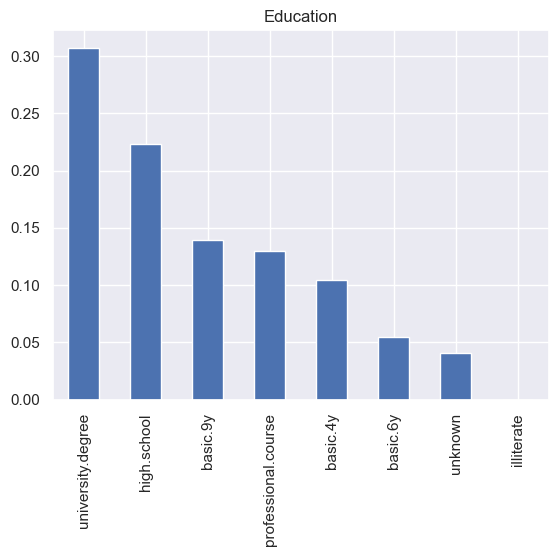

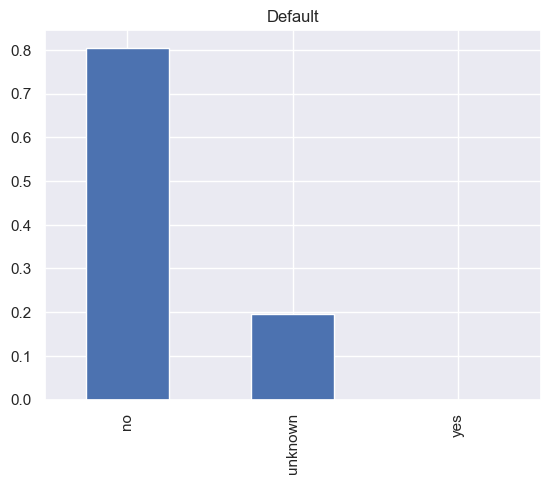

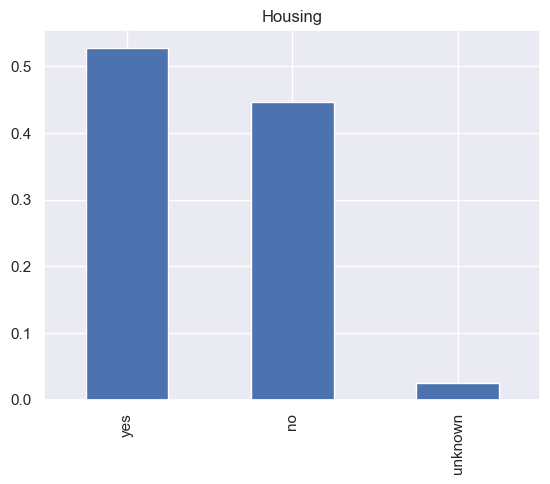

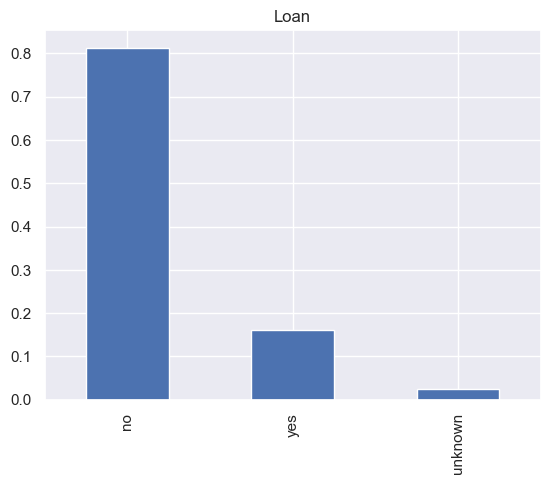

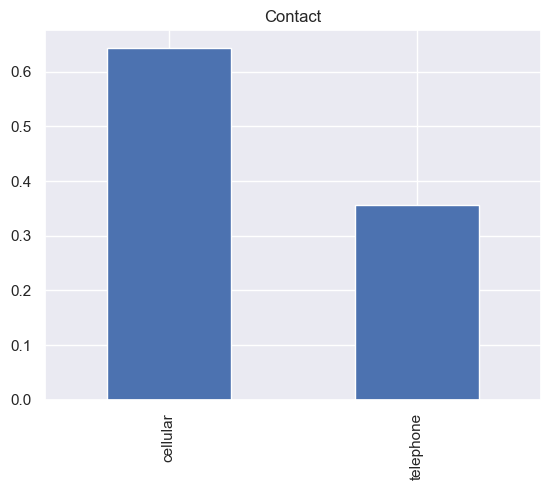

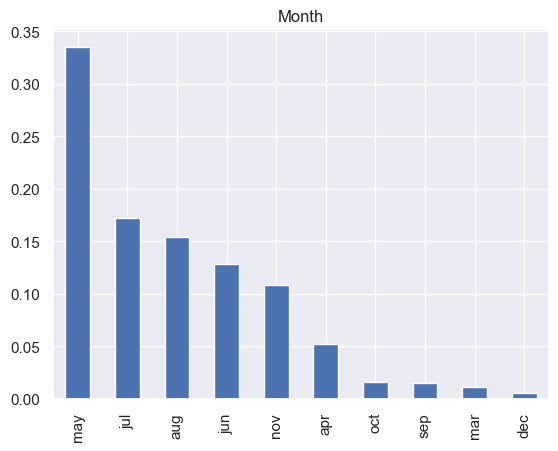

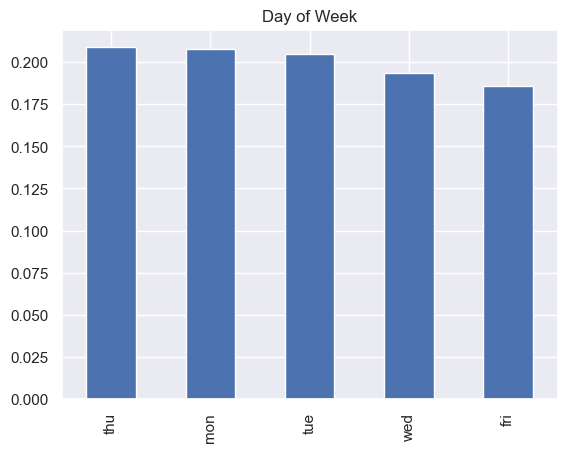

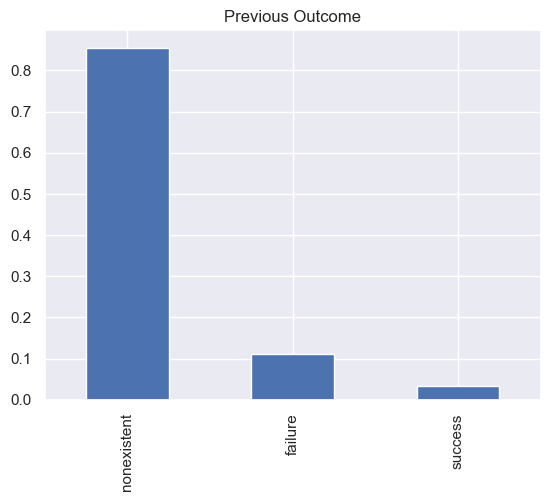

In [121]:
train['job'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Job')
plt.show()
train['marital'].value_counts(normalize=True).plot.bar(title='Marital')
plt.show()
train['k'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['default'].value_counts(normalize=True).plot.bar(title='Default')
plt.show()
train['housing'].value_counts(normalize=True).plot.bar(title='Housing')
plt.show()
train['loan'].value_counts(normalize=True).plot.bar(title='Loan')
plt.show()
train['contact'].value_counts(normalize=True).plot.bar(title='Contact')
plt.show()
train['month'].value_counts(normalize=True).plot.bar(title='Month')
plt.show()
train['day_of_week'].value_counts(normalize=True).plot.bar(title='Day of Week')
plt.show()
train['poutcome'].value_counts(normalize=True).plot.bar(title='Previous Outcome')
plt.show()

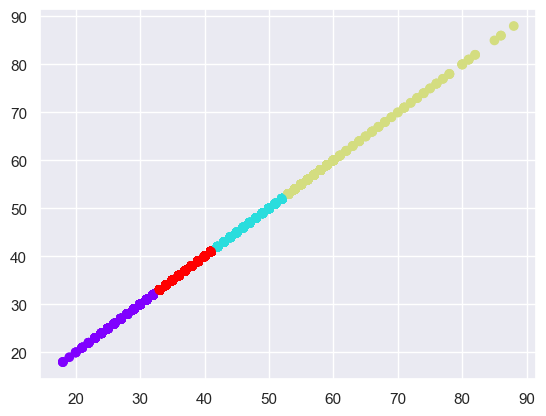

In [122]:
# KMeans clustering for age to help understand 1st hypothesis
data = train.copy()
x = data[['age']]
kmeans = KMeans(4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['age_cluster'] = identified_clusters 
plt.scatter(data_with_clusters['age'], data_with_clusters['age'], c=data_with_clusters['age_cluster'], cmap='rainbow')

From numerical variables we're looking at age only as the other numerical variables, in my discrete opinion, do not give an actionable insight at this stage of analysis

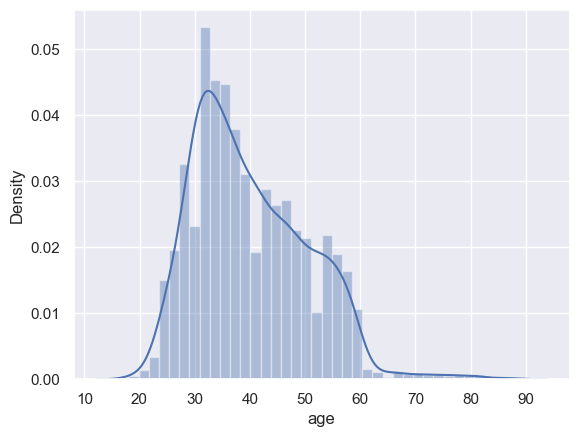

In [123]:
sns.distplot(train['age'])
plt.show()

We will now perform a bivariate analysis looking at the variables critical to the assesment of hypothesis outlined at the top of this Notebook

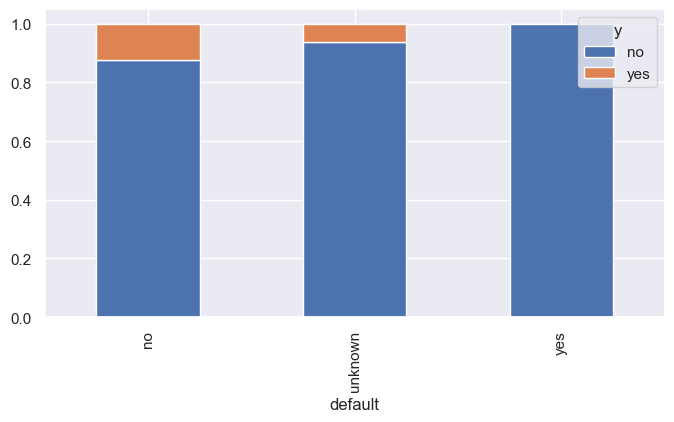

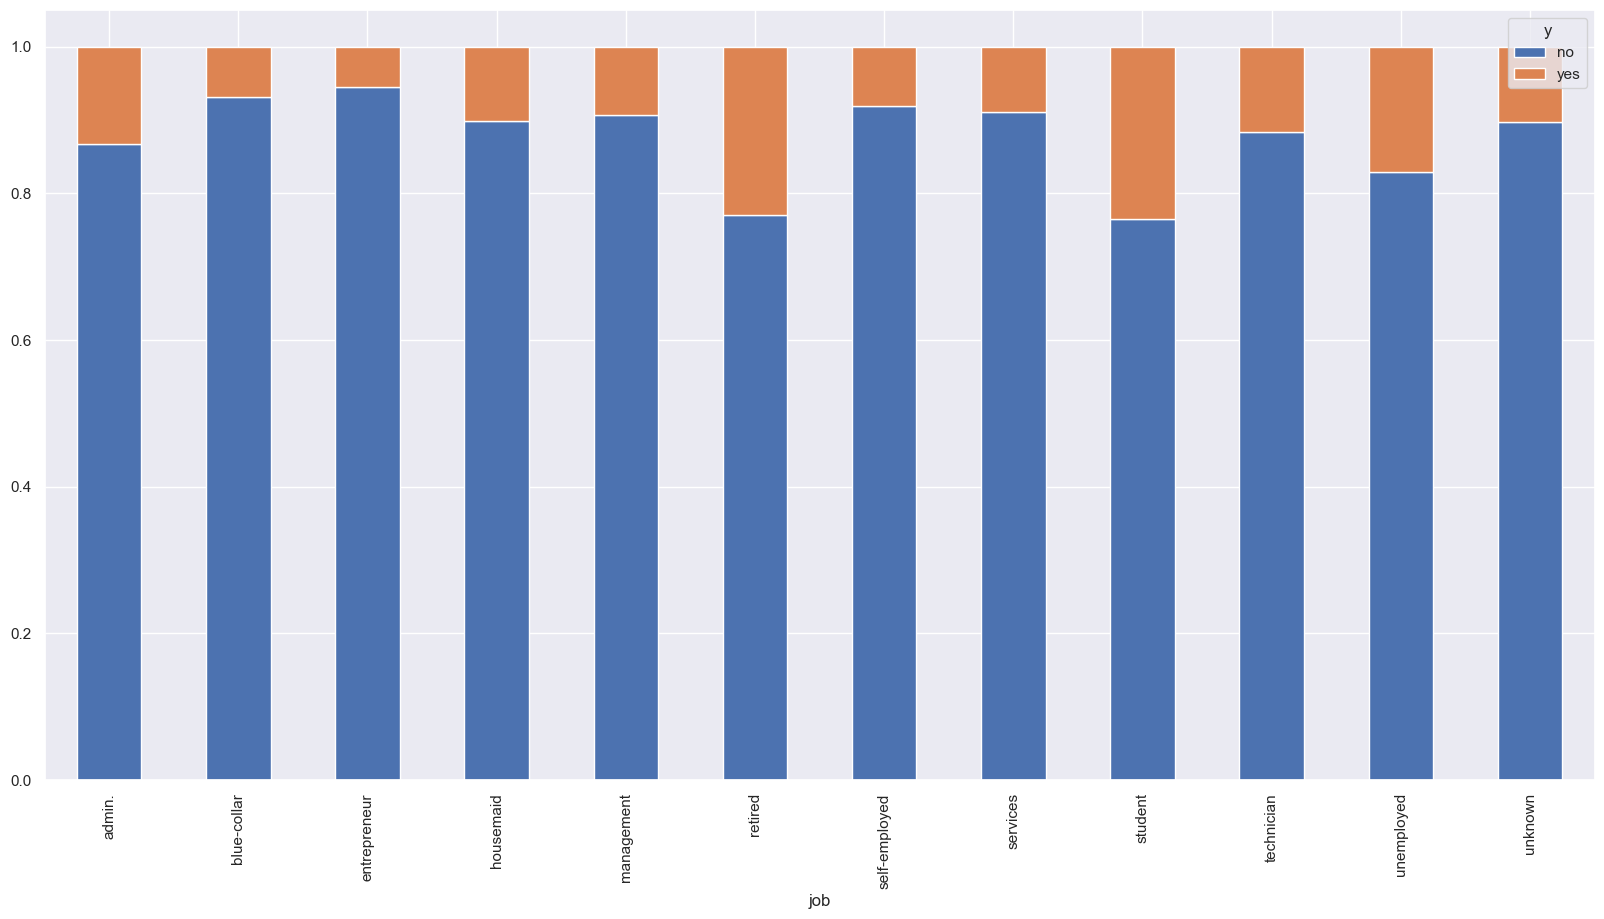

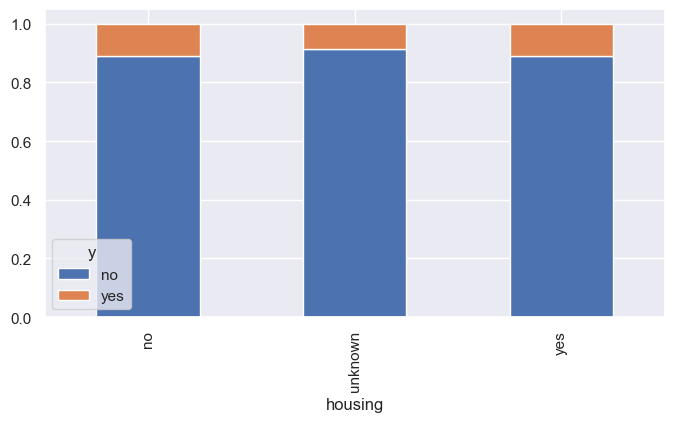

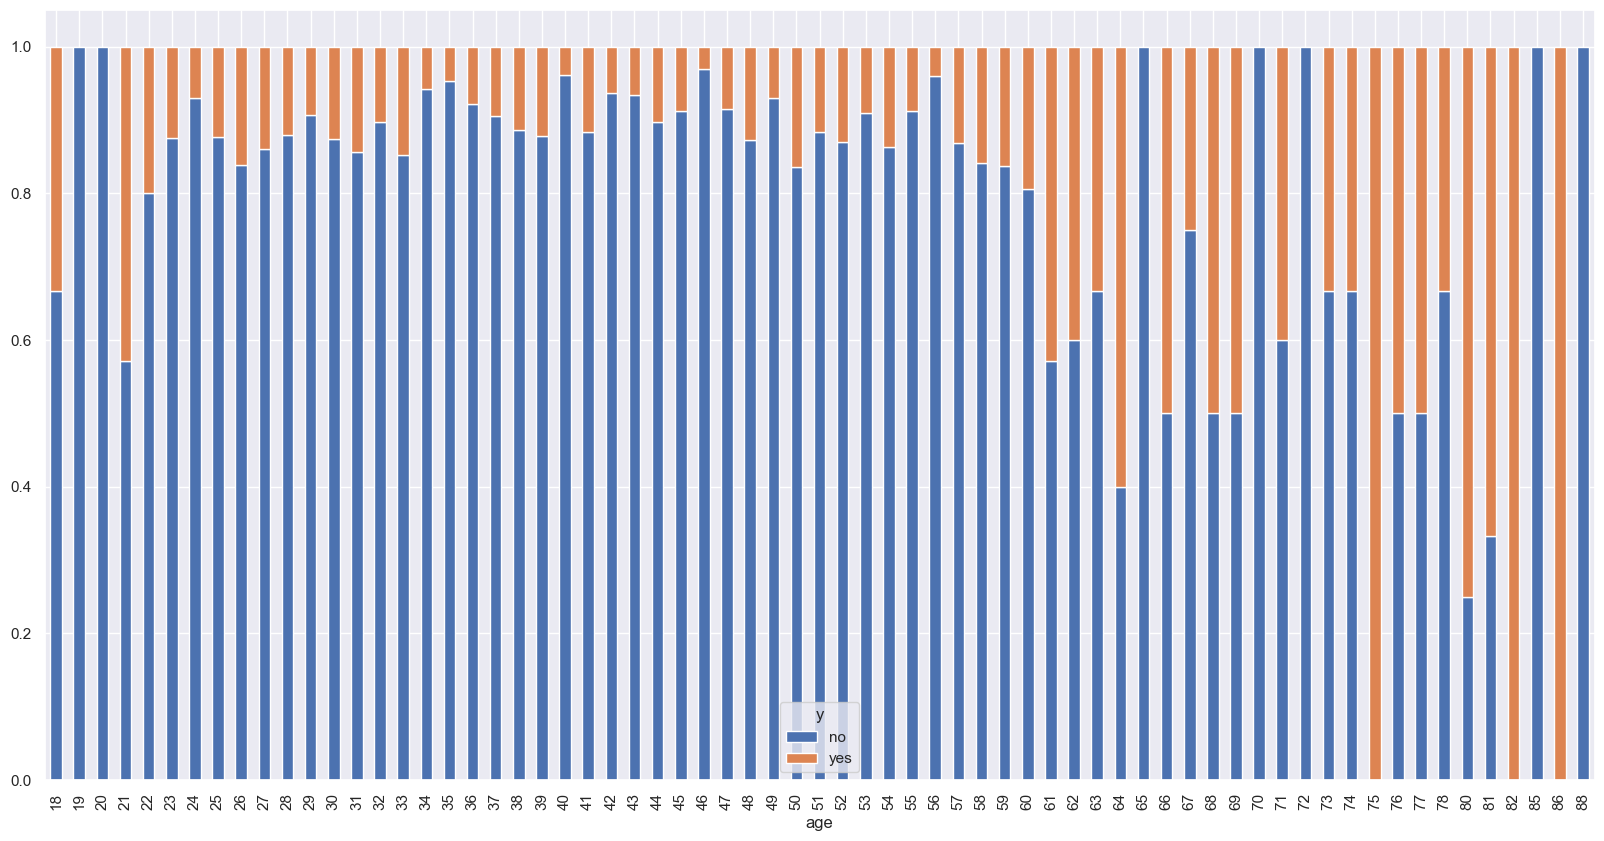

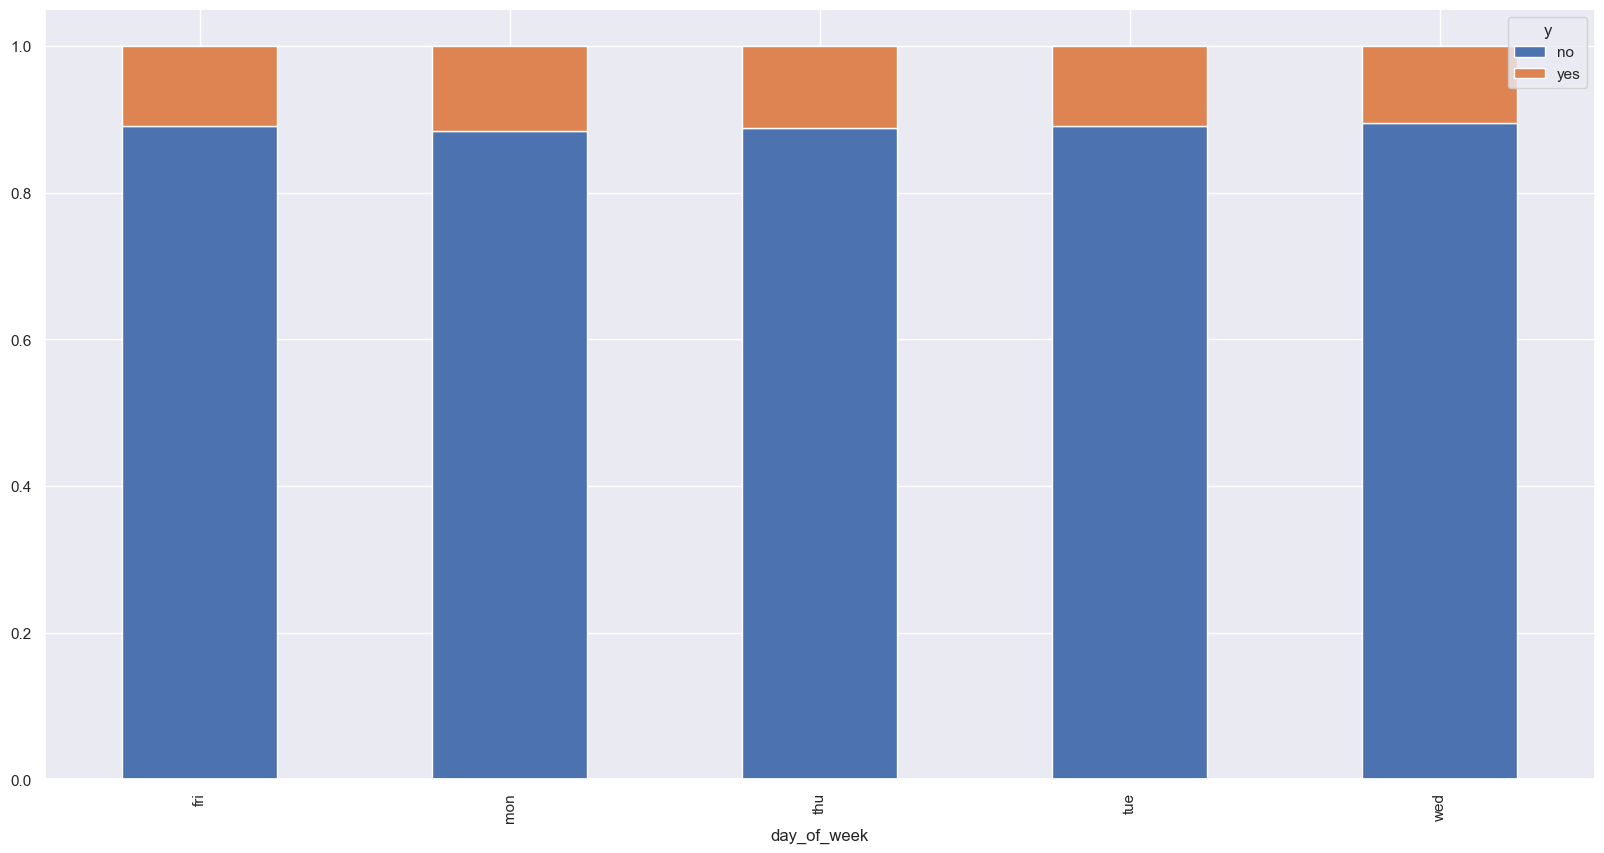

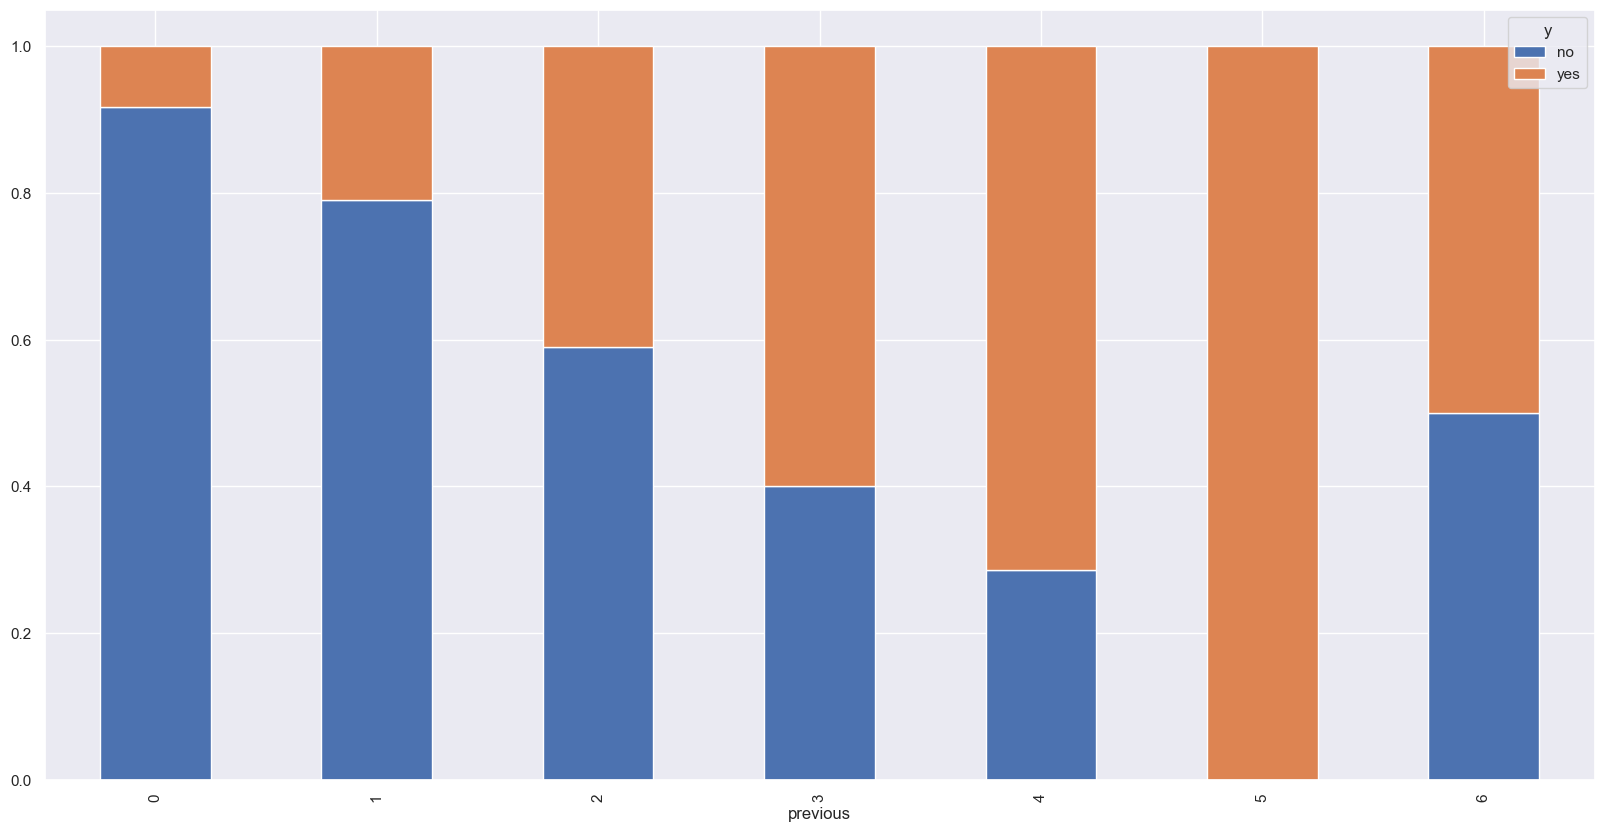

In [124]:
# Evaluating people who did not default against the approved loan status
default = pd.crosstab(train['default'],train['y'])
default.div(default.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,4))
plt.show()
management = pd.crosstab(train['job'],train['y'])
management.div(management.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,10))
plt.show()
housing = pd.crosstab(train['housing'],train['y'])
housing.div(housing.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,4))
plt.show()
age = pd.crosstab(train['age'],train['y'])
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,10))
plt.show()
day_of_week = pd.crosstab(train['day_of_week'],train['y'])
day_of_week.div(day_of_week.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,10))
plt.show()
previous = pd.crosstab(train['previous'],train['y'])
previous.div(previous.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(20,10))
plt.show()

Below we will explore the correlation between the variables available in the dataset to gain a better understanding of dependancies

<Axes: >

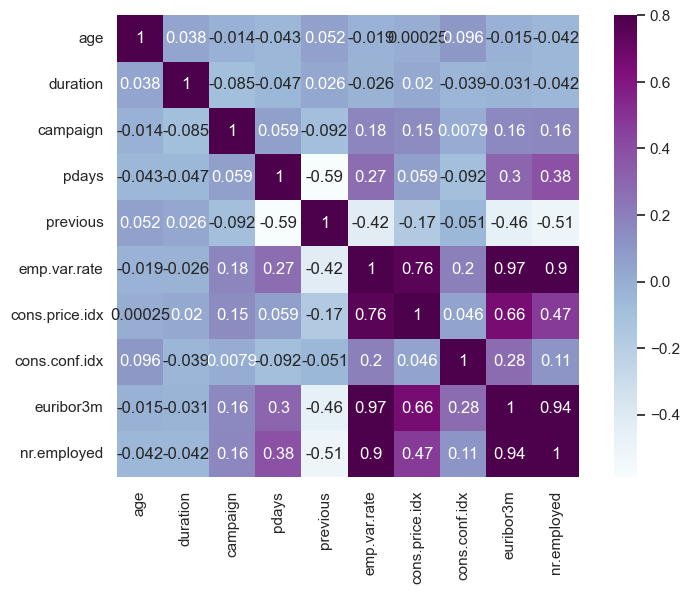

In [125]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

It can be inferred that the biggest correlation is between the market indicators and not so much in other dimensions (regarding applicants themselves or marketing measures undertaken)

We will now treat the outliers in the Age column by doing a log transformation applied to both train and test data

<Axes: >

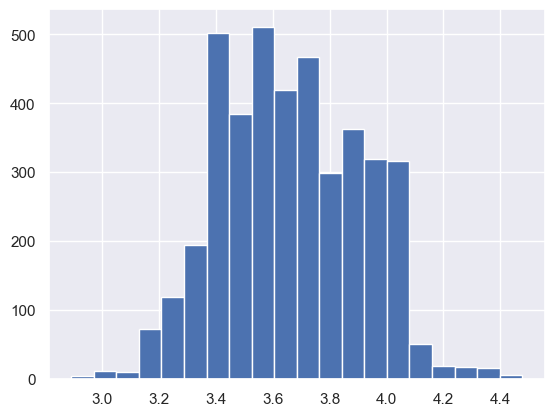

In [126]:
train['age_log']=np.log(train['age'])
train['age_log'].hist(bins=20)

# Model building

We will use logistic regression which is used to predict a binary outcome

As logistic regression takes only numerical values, we will transform the categorical variables into numerical values that can be understood by logistic regression

In [127]:
#define the predictor variables and the response variable
X = train.drop('y',1)
y = train.y

X = pd.get_dummies(X)
train = pd.get_dummies(train)

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#get predictions and model scoring
pred_cv = log_regression.predict(X_test)
score = round(metrics.accuracy_score(y_test,pred_cv), 3)

# prepare information for ROC curve
y_pred_prob = log_regression.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob, pos_label='yes')

roc_auc = metrics.auc(fpr, tpr)

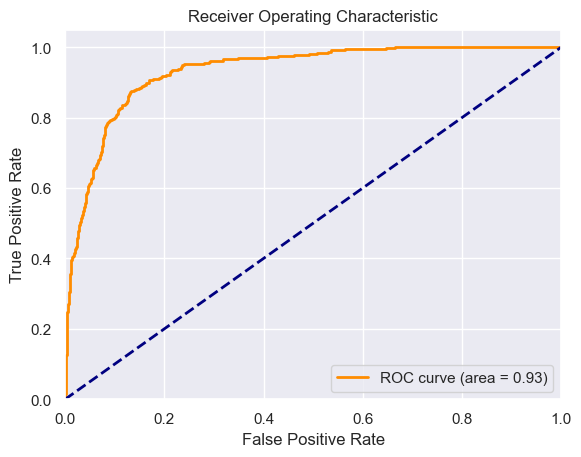

In [128]:
# plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Text(0.5, 1.0, 'Accuracy Score: 0.904')

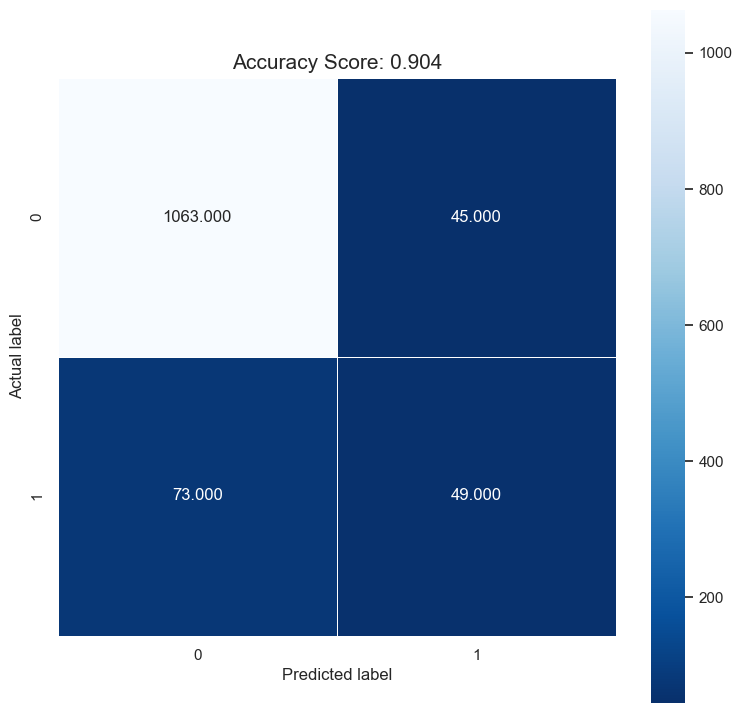

In [129]:
# preparing and plotting confusion matrix
cm = metrics.confusion_matrix(y_test, pred_cv)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)